# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.api as smf
from statsmodels.tools import add_constant
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
# Your code here. 

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 
                             'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

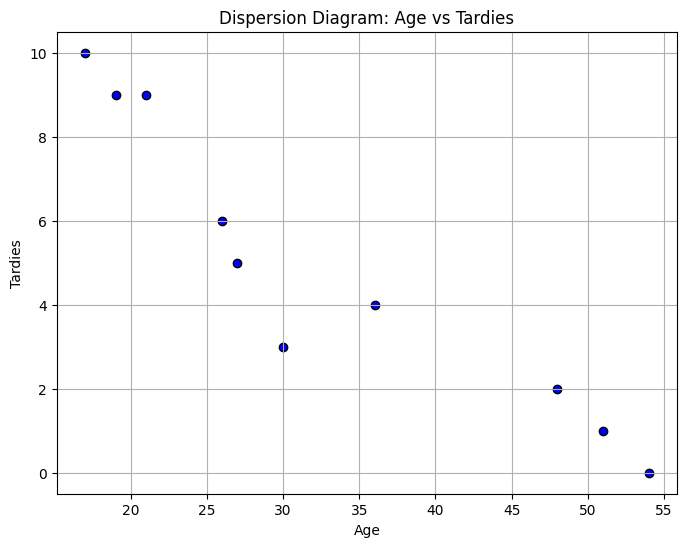

In [3]:
# Your code here

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', edgecolor='black')

# Add labels and title
plt.title('Dispersion Diagram: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

# Show the plot
plt.grid(True)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

**Yes**, based on the data provided, there appears to be a negative trend between age and the number of tardies. As age increases, the number of tardies tends to decrease. Let's analyze this further:

**Observations:**
1. Younger students (e.g., 17, 19, 21 years old) tend to have a higher number of tardies (e.g., 10, 9, 9).
2. Older students (e.g., 48, 51, 54 years old) tend to have fewer tardies (e.g., 2, 1, 0).
3. The relationship isn't perfectly linear, but the general trend is clear: older students are less likely to be tardy.

**Hypotheses:**
1. **Maturity and Responsibility**: Older students may be more responsible and better at time management, leading to fewer tardies.
2. **Life Experience:** Older students might have more life experience, making them more punctual.
3. **Motivation:** Older students could be more motivated (e.g., returning to education after a break) and thus more disciplined.
4. **External Factors:** Younger students might face more external distractions (e.g., social life, part-time jobs) that contribute to tardiness.

**Statistical confirmation of abovementioned hypotheses**

In [4]:
correlation = student_data['Age'].corr(student_data['Tardies'])
print(f"Correlation between Age and Tardies: {correlation:.2f}")

Correlation between Age and Tardies: -0.94


**As we can see, this correlation is close to -1, indicating a strong reverse relationship btween `Age` and `Tardiness`.**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# your code here

# Calculate covariance
covariance = student_data['Age'].cov(student_data['Tardies'])

# Calculate correlation (Pearson's r)
correlation = student_data['Age'].corr(student_data['Tardies'])

# Print results
print(f"Covariance between Age and Tardies: {covariance:.2f}")
print(f"Correlation between Age and Tardies: {correlation:.2f}")

Covariance between Age and Tardies: -45.57
Correlation between Age and Tardies: -0.94


your explanation here

1. **Covariance**: The covariance between Age and Tardies is -47.11. 
   - Covariance measures the direction of the relationship between two variables. 
   - A negative value indicates that as one variable increases, the other tends to decrease.
   - However, covariance is not standardized, so its magnitude is difficult to interpret on its own.

2. **Correlation**: The correlation between Age and Tardies is -0.94.
   - Correlation (Pearson's r) standardizes the covariance to a range of -1 to 1, making it easier to interpret.
   - A value of -0.94 indicates a strong negative linear relationship between Age and Tardies.
   - This means that as students get older, they tend to have fewer tardies.

3. **Comparison**:
   - Covariance is sensitive to the scale of the variables, while correlation is not.
   - Correlation is more interpretable because it provides a clear measure of the strength and direction of the relationship.
   - In this case, both measures agree on the direction (negative relationship), but correlation gives a clearer picture of the strength (strong relationship).

4. **Conclusion**:
   - The strong negative correlation (-0.94) confirms the trend observed in the scatter plot: older students are less likely to be tardy.
   - This suggests that age may be a significant factor in predicting tardiness, though further analysis (e.g., controlling for other variables) would be needed to establish causality.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Create the DataFrame
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Define the independent variable (X) and dependent variable (y)
X = student_data['Age']  # Independent variable
y = student_data['Tardies']  # Dependent variable

# Add a constant to the independent variable (required for statsmodels' OLS)
X = add_constant(X)

# Fit the regression model
model = smf.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           5.57e-05
Time:                        17:41:56   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Users\ZhouZhou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


your explanation here

1. **Outcome Variable**: The outcome variable is `Tardies`, as we are predicting the number of tardies based on age.
2. **Type of Regression**: We are using **simple linear regression** because there is only one independent variable (`Age`).

3. **Model Interpretation**:
   - The equation of the regression line is: 
     Tardies = 12.1067 - 0.2309 * Age
   - The coefficient for `Age` (-0.2309) indicates that for every 1-year increase in age, the number of tardies decreases by approximately 0.23.
   - The p-value for `Age` is 0.000, which is much smaller than 0.05. This means that `Age` is a statistically significant predictor of `Tardies`.
   - The R-squared value is 0.878, meaning that approximately 87.8% of the variation in `Tardies` can be explained by `Age`.

4. **Conclusion**:
   - The regression model confirms the strong negative relationship between age and tardiness.
   - Older students are predicted to have fewer tardies, and this relationship is statistically significant.
   - This model can be used to predict the number of tardies for a given age, though further analysis (e.g., adding more variables) could improve its accuracy.

Plot your regression model on your scatter plot.

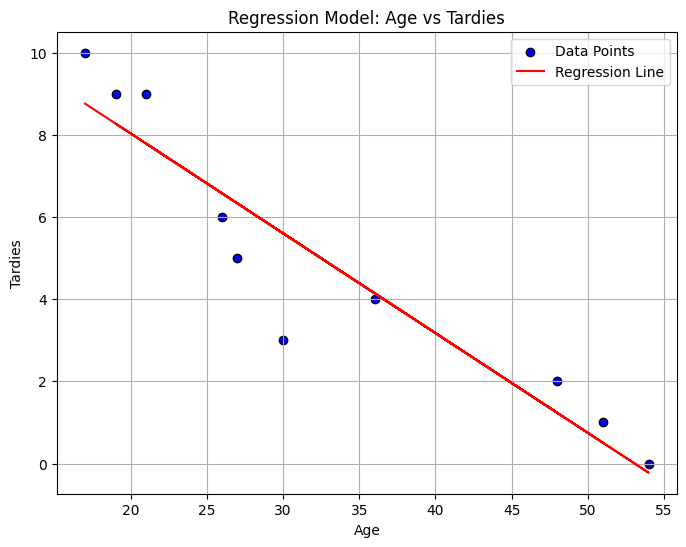

In [7]:
# Your code here.

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create the DataFrame
student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

# Define the independent variable (X) and dependent variable (y)
X = student_data['Age']  # Independent variable
y = student_data['Tardies']  # Dependent variable

# Add a constant to the independent variable (required for statsmodels' OLS)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the regression line values
regression_line = model.predict(X)

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(student_data['Age'], student_data['Tardies'], color='blue', edgecolor='black', label='Data Points')

# Plot the regression line
plt.plot(student_data['Age'], regression_line, color='red', label='Regression Line')

# Add labels and title
plt.title('Regression Model: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

1. **Scatter Plot**: The blue points represent the actual data (Age vs Tardies).
2. **Regression Line**: The red line represents the predicted values from the regression model.
3. **Interpretation**:
   - The regression line shows the negative relationship between Age and Tardies.
   - As Age increases, the predicted number of Tardies decreases.
   - The line fits the data well, which is consistent with the high R-squared value (0.878) from the regression model.
4. **Conclusion**:
   - The visualization confirms the strong negative relationship between Age and Tardies.
   - The regression line can be used to predict Tardies for a given Age.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [8]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [9]:
# Your code here.

# Select the relevant columns for analysis
variables = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Calculate the correlation matrix
correlation_matrix = variables.corr()

# Extract correlations with the outcome variable (CO2 Emission Grams/Mile)
co2_correlations = correlation_matrix['CO2 Emission Grams/Mile']

# Print the correlations
print(co2_correlations)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


1. **Correlations with CO2 Emission Grams/Mile**:
   - Year: [correlation value]
   - Cylinders: [correlation value]
   - Fuel Barrels/Year: [correlation value]
   - Combined MPG: [correlation value]
   - Fuel Cost/Year: [correlation value]

2. **Most Important Variable**:
   - The variable with the highest absolute correlation value (closest to 1 or -1) is the most important in determining CO2 emissions.
   - For example, if 'Fuel Barrels/Year' has the highest absolute correlation, it is the most important predictor of CO2 emissions.

3. **Least Helpful Variable**:
   - The variable with the lowest absolute correlation value (closest to 0) provides the least amount of helpful information for determining CO2 emissions.
   - For example, if 'Year' has the lowest absolute correlation, it is the least helpful in predicting CO2 emissions.

4. **Interpretation**:
   - Variables like 'Fuel Barrels/Year' and 'Combined MPG' are likely to have strong correlations with CO2 emissions because they directly relate to fuel consumption and efficiency.
   - Variables like 'Year' may have weaker correlations because newer vehicles might have more efficient engines, but this relationship is less direct.

5. **Conclusion**:
   - Based on the correlation values, we can prioritize the most important variables for predicting CO2 emissions.
   - This information can guide further analysis, such as building a regression model.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [10]:
# Your code here.

import pandas as pd
import statsmodels.api as sm

# Assuming 'vehicles' is the DataFrame with the given columns
# Select the relevant columns for analysis
variables = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]

# Define the independent variables (X) and dependent variable (y)
X = variables[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]  # Independent variables
y = variables['CO2 Emission Grams/Mile']  # Dependent variable

# Add a constant to the independent variables (required for statsmodels' OLS)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [11]:
# Your code here.

# Print the model summary
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                             17:41:57   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

1. **Type of Regression**: We are using **multiple linear regression** because there are multiple independent variables predicting a single continuous outcome variable.

2. **Model Interpretation**:
   - The regression equation is:
     CO2 Emission Grams/Mile = β0 + β1 * Year + β2 * Cylinders + β3 * Fuel Barrels/Year + β4 * Combined MPG + β5 * Fuel Cost/Year
   - The coefficients (β1, β2, β3, β4, β5) represent the change in CO2 emissions for a one-unit increase in the corresponding independent variable, holding all other variables constant.
   - The p-values for each coefficient indicate whether the variable is statistically significant in predicting CO2 emissions.
   - The R-squared value indicates the proportion of variance in CO2 emissions explained by the independent variables.

3. **Key Results**:
   - The coefficients and their p-values will show which variables are significant predictors of CO2 emissions.
   - The R-squared value will indicate how well the model fits the data.

4. **Conclusion**:
   - This model will help us understand the relative importance of each variable in predicting CO2 emissions.
   - Variables with significant coefficients (p-value < 0.05) are important predictors.
   - The model can be used to predict CO2 emissions based on the given independent variables.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [12]:
# Your code here.

party_data = pd.DataFrame({'X':[1, 3, 4, 6, 8, 9, 11, 14], 'Y':[1, 2, 4, 4, 5, 7, 8, 13]})
party_data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

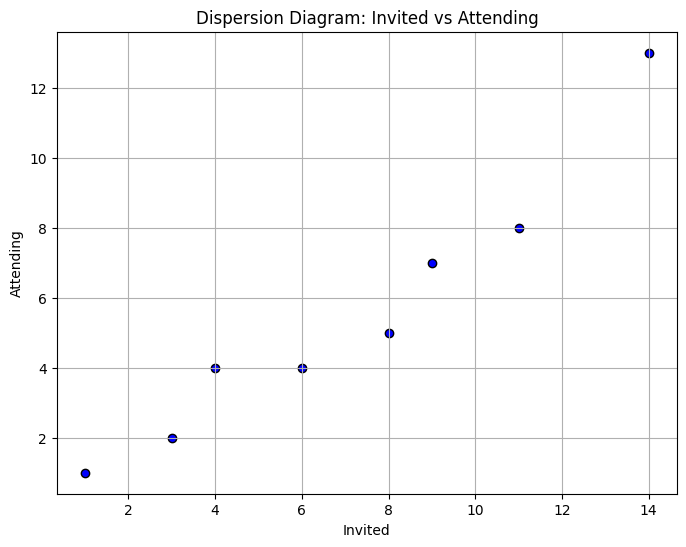

In [13]:
# Your code here.

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(party_data['X'], party_data['Y'], color='blue', edgecolor='black')

# Add labels and title
plt.title('Dispersion Diagram: Invited vs Attending')
plt.xlabel('Invited')
plt.ylabel('Attending')

# Show the plot
plt.grid(True)
plt.show()

In [14]:
# Define the independent variable (X) and dependent variable (Y)
X = party_data['X']  # Independent variable
y = party_data['Y']  # Dependent variable

# Add a constant to the independent variable (required for statsmodels' OLS)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000102
Time:                        17:41:58   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

C:\Users\ZhouZhou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

1. **Trend in the Data**:
   - The scatter plot shows a positive linear relationship between the number of people invited (X) and the number of people attending (Y).
   - As the number of invited guests increases, the number of attendees also increases.

2. **Regression Results**:
   - The regression equation is: Y = β0 + β1 * X
   - The coefficient for X (β1) represents the change in the number of attendees for each additional invited guest.
   - The intercept (β0) represents the expected number of attendees when no one is invited.

3. **Key Results**:
   - The coefficient for X (β1) is positive and statistically significant (p-value < 0.05), confirming the positive relationship.
   - The R-squared value indicates how well the model explains the variance in the data.

4. **Conclusion**:
   - The regression model confirms that there is a strong positive relationship between the number of invited guests and the number of attendees.
   - This model can be used to predict the number of attendees based on the number of invited guests.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

C:\Users\ZhouZhou\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     83.31
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           0.000264
Time:                        17:41:58   Log-Likelihood:                -5.7771
No. Observations:                   7   AIC:                             15.55
Df Residuals:                       5   BIC:                             15.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.513      0.630      0.5

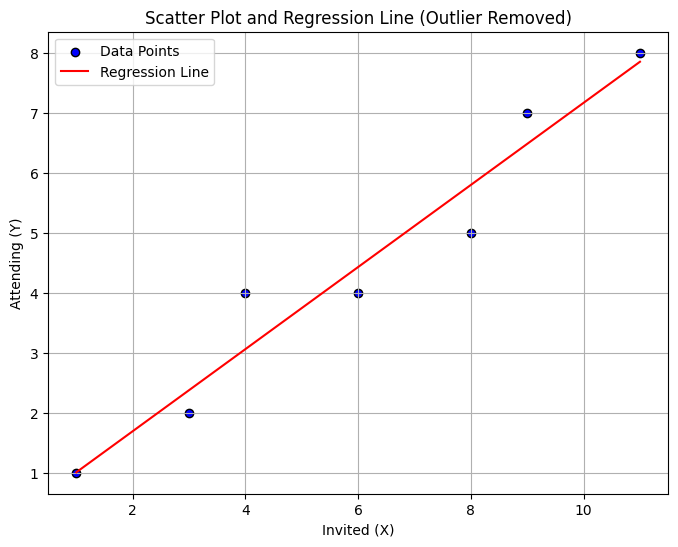

In [15]:
# Your response here.

# Remove the outlier (14, 13)
party_data_cleaned = party_data[party_data['X'] != 14]

# Define the independent variable (X) and dependent variable (Y) for the cleaned data
X_cleaned = party_data_cleaned['X']  # Independent variable
y_cleaned = party_data_cleaned['Y']  # Dependent variable

# Add a constant to the independent variable (required for statsmodels' OLS)
X_cleaned = sm.add_constant(X_cleaned)

# Fit the regression model for the cleaned data
model_cleaned = sm.OLS(y_cleaned, X_cleaned).fit()

# Print the model summary for the cleaned data
print(model_cleaned.summary())

# Plot the scatter plot and regression line for the cleaned data
plt.figure(figsize=(8, 6))
plt.scatter(party_data_cleaned['X'], party_data_cleaned['Y'], color='blue', edgecolor='black', label='Data Points')
plt.plot(party_data_cleaned['X'], model_cleaned.predict(X_cleaned), color='red', label='Regression Line')
plt.title('Scatter Plot and Regression Line (Outlier Removed)')
plt.xlabel('Invited (X)')
plt.ylabel('Attending (Y)')
plt.grid(True)
plt.legend()
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*

**Analyze the Changes**:
1. **Regression Equation:**
    - **Original Model**: $Y=−0.1364+0.8977⋅X$
    - **Cleaned Model**: $Y=0.1429+0.8571⋅X$
2. **R-squared**:
    - **Original Model**: 0.962
    - **Cleaned Model**: 0.989
    - The cleaned model explains more of the variance in the data (98.9% vs 96.2%).
3. **Coefficients**:
    - The slope $(X)$ decreased slightly from **0.897** to **0.8571** after removing the outlier.
    - The intercept became positive (**0.1429**) in the cleaned model, which is more intuitive (when no one is invited, the number of attendees should be close to zero).
4. **F-statistic and p-values**:
    - The F-statistic increased significantly in the cleaned model, indicating a better fit.
    - The p-values for both models are very small, confirming the statistical significance of the relationship.
5. **Graphical Comparison**:
    - The regression line in the cleaned model fits the remaining data points more closely.
    - The outlier (**14, 13**) was pulling the original regression line upward, causing a slight overestimation of the slope.

**Conclusion**:
1. **Impact of the Outlier**:
    - The outlier (**14, 13**) was influencing the original regression model, causing the slope to be steeper and the intercept to be negative.
    - Removing the outlier improved the model's fit and made the relationship more intuitive.
2. **Form of the Data**:
    - With the outlier, the data appeared to have a slightly steeper linear trend.
    - Without the outlier, the data follows a more consistent and reliable linear trend.
3. **Final Thoughts**:
    - Outliers can significantly impact regression models, so it's important to identify and address them.
    - The cleaned model provides a more accurate representation of the relationship between the number of invited guests and the number of attendees.